<p style='text-align:center;
          font-family: sans-serif;
          font-weight:bold;
          color:black;
          font-size:40px;
          margin: 30px;'> Walmart Sales 
    <font color='#128EB3'; size='7'>Forecasting</font></p>
<p style="text-align:center;
          font-family: sans-serif;
          font-weight:bold;
          color:#616161;
          font-size:20px;
          margin: 30px;">Neural Prophet model 📉</p>

<h3 style="text-align: left; background-color: #128EB3; font-family:Trebuchet MS; color: white; padding: 14px; line-height: 1; border-radius:10px"> Notebook goals🔎</h3>

In this first version of the project the objective will be: 

* Predicting store-level sales behavior through time series modeling with some of the libraries available in Python

**Note: I have divided the project into several notebooks for each of the models used for sales forecasting. I leave the link below:**

* [Exploratory Data Analysis](https://www.kaggle.com/code/armandodelahoya/walmart-sales-forecasting-eda/notebook)
* [Prophet model](https://www.kaggle.com/code/armandodelahoya/walmart-sales-forecasting-prophet-model/notebook)
* [Neural prophet model](https://www.kaggle.com/code/armandodelahoya/walmart-sales-forecasting-neural-model/notebook)
* [PyCaret library](https://www.kaggle.com/code/armandodelahoya/walmart-sales-forecasting-pycaret-library/notebook)
* [Power BI Dashboard](https://app.powerbi.com/view?r=eyJrIjoiNWFjYWU0ZTktNjFiYS00Zjg3LTg0M2MtOTMzM2M0MjQ5OThmIiwidCI6IjAyNDlhNTcxLWI5YTItNGNhMi1iOTNiLTIwYzc3MDg4ZjA4YiJ9)
* [Github repository](https://github.com/ArmandoLazalde/Walmart-Sales-Forecasting)

<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
    <h3 style="text-align: left; background-color: #128EB3; font-family:Trebuchet MS; color: white; padding: 14px; line-height: 1; border-radius:10px"><b>Table of Contents</b></h3>
    
* [1. Import necessary libraries](#1)
* [2. Best store analysis](#2)
* [3. All stores analysis](#3)

<a id="1"></a>
<h3 style="text-align: left;
           background-color: #128EB3;
           font-family:Trebuchet MS; 
           color: white; 
           padding: 14px; 
           line-height: 1; 
           border-radius:10px"> 1. Import necessary libraries
</h3>

In [1]:
pip install neuralprophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.6/230.6 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 45.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 70.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 5.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.8/137.8 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.1/185.1 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 82.8 MB/s eta 0:00:00:00:0100:01
  Created wheel for plotly-resampler: filename=plotly_resampler-0.8.3.2-cp37-cp37m-manylinux_2_31_x86_64.whl size=75901 sha256=0513102d2d53c6d96591d7897b7e852d8d9fbfb12a96f31e6ff1e7d423cad430
  Stored in directory

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
from zipfile import ZipFile

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['font.family'] = 'Trebuchet MS'

matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize'] = (8, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

import warnings
warnings.filterwarnings('ignore')
from neuralprophet import NeuralProphet

#Metrics
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

In [3]:
with ZipFile('/kaggle/input/walmart-recruiting-store-sales-forecasting/features.csv.zip') as f:
    f.extractall(path='walmart-recruiting-store-sales-forecasting')
    
with ZipFile('/kaggle/input/walmart-recruiting-store-sales-forecasting/sampleSubmission.csv.zip') as f:
    f.extractall(path='walmart-recruiting-store-sales-forecasting') 
    
with ZipFile('/kaggle/input/walmart-recruiting-store-sales-forecasting/test.csv.zip') as f:
    f.extractall(path='walmart-recruiting-store-sales-forecasting') 
    
with ZipFile('/kaggle/input/walmart-recruiting-store-sales-forecasting/train.csv.zip') as f:
    f.extractall(path='walmart-recruiting-store-sales-forecasting') 

In [4]:
train_df = pd.read_csv('/kaggle/working/walmart-recruiting-store-sales-forecasting/train.csv')
features_df = pd.read_csv('/kaggle/working/walmart-recruiting-store-sales-forecasting/features.csv')
stores_df = pd.read_csv('/kaggle/input/walmart-recruiting-store-sales-forecasting/stores.csv')
test_df = pd.read_csv('/kaggle/working/walmart-recruiting-store-sales-forecasting/test.csv')

In [5]:
data = train_df.merge(features_df, on=['Store', 'Date', 'IsHoliday'], how = 'inner')
final_df = data.merge(stores_df, on=['Store'], how='inner')
final_df.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


<a id="1"></a>
<h3 style="text-align: left;
           background-color: #128EB3;
           font-family:Trebuchet MS; 
           color: white; 
           padding: 14px; 
           line-height: 1; 
           border-radius:10px"> 2. Best store analisys
</h3>

In [6]:
#Store 20 analysis
store20 = final_df[final_df['Store'] == 20]
store20 = store20[['Date','Weekly_Sales']]
store20 = store20.groupby('Date').sum()
store20.reset_index(inplace = True)

store20['Date'] = pd.to_datetime(store20['Date']) #converting 'date' column to a datetime type
store20.columns=['ds','y'] #Rename columns
store20

,ds,y
0,2010-02-05,2401395.47
1,2010-02-12,2109107.90
2,2010-02-19,2161549.76
3,2010-02-26,1898193.95
4,2010-03-05,2119213.72
...,...,...
138,2012-09-28,2008350.58
139,2012-10-05,2246411.89
140,2012-10-12,2162951.36
141,2012-10-19,1999363.49


In [7]:
#Split y_train and y_test
y_train = store20.iloc[:120]
y_test = store20.iloc[120:]

In [8]:
#Model training
model = NeuralProphet()
model.fit(y_train, freq="W-Fri")

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-Fri
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 482
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (8) is too small than the required number for the learning rate finder (208).

Finding best initial lr:   0%|          | 0/208 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

,MAE,RMSE,Loss,RegLoss,epoch
0,522923.062500,599399.750000,0.136117,0.0,0
1,510122.531250,592748.062500,0.130720,0.0,1
2,494119.218750,574782.375000,0.124304,0.0,2
3,496471.125000,570064.812500,0.123945,0.0,3
4,505272.781250,584557.687500,0.126435,0.0,4
...,...,...,...,...,...
477,134147.093750,191414.343750,0.016675,0.0,477
478,133745.515625,198918.578125,0.017095,0.0,478
479,133398.203125,196249.312500,0.016733,0.0,479
480,134329.015625,195910.500000,0.016772,0.0,480


In [9]:
#Forecasting
future = model.make_future_dataframe(y_train, periods=52)
forecast = model.predict(future)

INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-Fri
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 98.077% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-Fri
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 98.077% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-Fri


Predicting: 8it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


In [10]:
model.plot(forecast)

FigureWidgetResampler({
    'data': [{'fill': 'none',
              'line': {'color': 'rgba(45, 146, 255, 1.0)', 'width': 2},
              'mode': 'lines',
              'name': 'yhat1',
              'type': 'scatter',
              'uid': '44ebe964-c1ca-4ee8-9c82-e46a94425d4b',
              'x': array([datetime.datetime(2012, 5, 25, 0, 0),
                          datetime.datetime(2012, 6, 1, 0, 0),
                          datetime.datetime(2012, 6, 8, 0, 0),
                          datetime.datetime(2012, 6, 15, 0, 0),
                          datetime.datetime(2012, 6, 22, 0, 0),
                          datetime.datetime(2012, 6, 29, 0, 0),
                          datetime.datetime(2012, 7, 6, 0, 0),
                          datetime.datetime(2012, 7, 13, 0, 0),
                          datetime.datetime(2012, 7, 20, 0, 0),
                          datetime.datetime(2012, 7, 27, 0, 0),
                          datetime.datetime(2012, 8, 3, 0, 0),
                  

In [11]:
model.plot_components(forecast)

FigureWidgetResampler({
    'data': [{'line': {'color': '#2d92ff', 'width': 2},
              'mode': 'lines',
              'name': 'Trend',
              'showlegend': False,
              'type': 'scatter',
              'uid': 'fd5b47fb-019b-4dea-9465-700040528697',
              'x': array([datetime.datetime(2012, 5, 25, 0, 0),
                          datetime.datetime(2012, 6, 1, 0, 0),
                          datetime.datetime(2012, 6, 8, 0, 0),
                          datetime.datetime(2012, 6, 15, 0, 0),
                          datetime.datetime(2012, 6, 22, 0, 0),
                          datetime.datetime(2012, 6, 29, 0, 0),
                          datetime.datetime(2012, 7, 6, 0, 0),
                          datetime.datetime(2012, 7, 13, 0, 0),
                          datetime.datetime(2012, 7, 20, 0, 0),
                          datetime.datetime(2012, 7, 27, 0, 0),
                          datetime.datetime(2012, 8, 3, 0, 0),
                          dat

In [12]:
forecast.head(5)

,ds,y,yhat1,trend,season_yearly
0,2012-05-25,None,2078288.25,2180889.25,-102601.070312
1,2012-06-01,None,2147794.75,2182255.00,-34460.230469
2,2012-06-08,None,2210729.50,2183620.75,27108.529297
3,2012-06-15,None,2236144.75,2184986.50,51158.207031
4,2012-06-22,None,2211086.75,2186352.50,24734.291016


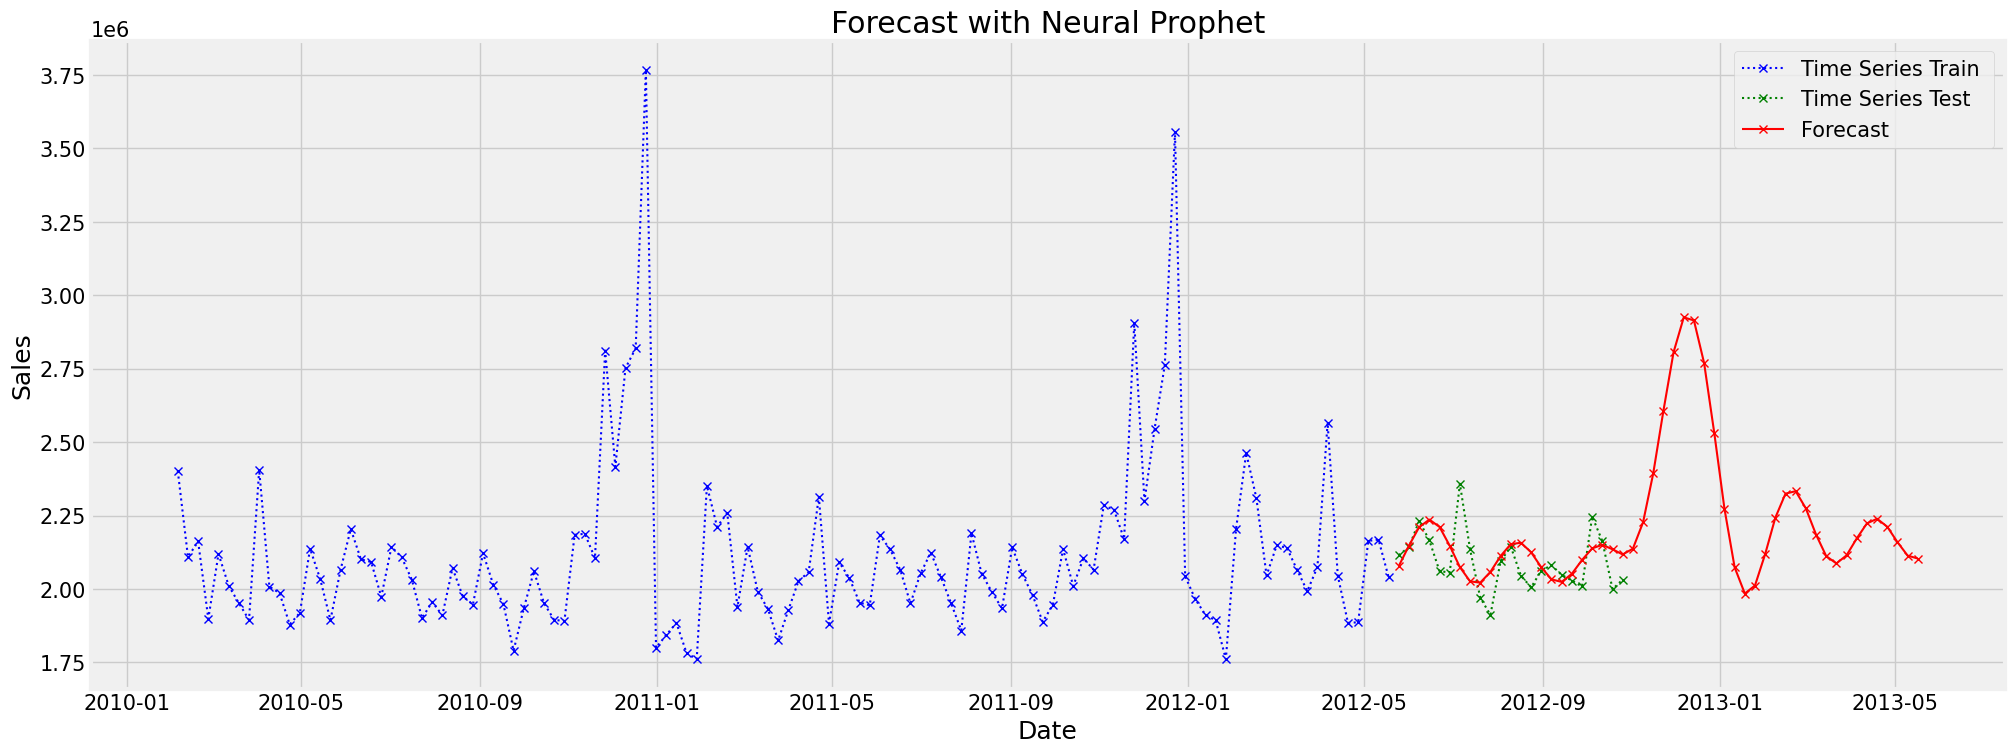

In [13]:
#Plot train, test and forecasting comparation 

plt.figure(figsize=(22,8))

plt.plot(y_train['ds'], y_train['y'], 'bx:')

plt.plot(y_test['ds'], y_test['y'], 'bx:', color='green')
plt.plot(forecast["ds"], forecast["yhat1"], "bx-", color="red")

plt.legend(['Time Series Train ','Time Series Test','Forecast'])
plt.title("Forecast with Neural Prophet")
plt.ylabel("Sales")
plt.xlabel("Date")
plt.show()

In [14]:
y_pred = forecast['yhat1'].head(len(y_test)).values

In [15]:
mape = mean_absolute_percentage_error(y_test['y'].values, y_pred).round(4)
mae = mean_absolute_error(y_test['y'].values, y_pred).round(4)
mse = mean_squared_error(y_test['y'].values, y_pred).round(4)
r2 = r2_score(y_test['y'].values, y_pred).round(4)
print(f"MAPE: {(mape)*(100)}%")
print(f"MAE: {(mae)}")
print(f"MSE: {(mse)}")
print(f"R2: {(r2)}")

MAPE: 3.65%
MAE: 76580.7978
MSE: 10033055598.7306
R2: -0.0591


<a id="3."></a>
<h3 style="text-align: left; background-color: #128EB3; font-family:Trebuchet MS; color: white; padding: 14px; line-height: 1; border-radius:6px"> 3. Analysis for all stores</h3>

In [16]:
# Neural Prophet for All Stores
results = {}

for store in final_df['Store'].unique():
    
    #Analysis per store
    store_x = final_df[final_df['Store'] == store]
    store_x = store_x[['Date','Weekly_Sales']]
    store_x = store_x.groupby('Date').sum()
    store_x.reset_index(inplace = True)
    store_x['Date'] = pd.to_datetime(store_x['Date'])
    
    store_x=store_x[['Date','Weekly_Sales']]
    store_x.columns=['ds','y']
    
    #Time series split to train the model
    y_train = store_x.iloc[:120]
    y_test = store_x.iloc[120:]

    #Model training
    model = NeuralProphet()
    model.fit(y_train, freq="W-FRI")
    
    future = model.make_future_dataframe(y_train, periods=23)
    forecast = model.predict(future)
    
    y_pred = forecast['yhat1'].tail(len(y_test)).values
    
    mape = (mean_absolute_percentage_error(y_test['y'].values, y_pred).round(4))*100
    mae = mean_absolute_error(y_test['y'].values, y_pred).round(4)
    
    results[store] = [mape, mae]

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 482
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (8) is too small than the required number for the learning rate finder (208).

Finding best initial lr:   0%|          | 0/208 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI


Predicting: 8it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 482
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of ba

Finding best initial lr:   0%|          | 0/208 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI


Predicting: 8it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 482
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of ba

Finding best initial lr:   0%|          | 0/208 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI


Predicting: 8it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 482
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of ba

Finding best initial lr:   0%|          | 0/208 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI


Predicting: 8it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 482
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of ba

Finding best initial lr:   0%|          | 0/208 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI


Predicting: 8it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 482
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of ba

Finding best initial lr:   0%|          | 0/208 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI


Predicting: 8it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 482
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of ba

Finding best initial lr:   0%|          | 0/208 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI


Predicting: 8it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 482
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of ba

Finding best initial lr:   0%|          | 0/208 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI


Predicting: 8it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 482
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of ba

Finding best initial lr:   0%|          | 0/208 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI


Predicting: 8it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 482
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of ba

Finding best initial lr:   0%|          | 0/208 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI


Predicting: 8it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 482
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of ba

Finding best initial lr:   0%|          | 0/208 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI


Predicting: 8it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 482
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of ba

Finding best initial lr:   0%|          | 0/208 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI


Predicting: 8it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 482
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of ba

Finding best initial lr:   0%|          | 0/208 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI


Predicting: 8it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 482
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of ba

Finding best initial lr:   0%|          | 0/208 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI


Predicting: 8it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 482
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of ba

Finding best initial lr:   0%|          | 0/208 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI


Predicting: 8it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 482
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of ba

Finding best initial lr:   0%|          | 0/208 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI


Predicting: 8it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 482
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of ba

Finding best initial lr:   0%|          | 0/208 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI


Predicting: 8it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 482
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of ba

Finding best initial lr:   0%|          | 0/208 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI


Predicting: 8it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 482
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of ba

Finding best initial lr:   0%|          | 0/208 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI


Predicting: 8it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 482
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of ba

Finding best initial lr:   0%|          | 0/208 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI


Predicting: 8it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 482
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of ba

Finding best initial lr:   0%|          | 0/208 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI


Predicting: 8it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 482
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of ba

Finding best initial lr:   0%|          | 0/208 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI


Predicting: 8it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 482
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of ba

Finding best initial lr:   0%|          | 0/208 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI


Predicting: 8it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 482
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of ba

Finding best initial lr:   0%|          | 0/208 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI


Predicting: 8it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 482
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of ba

Finding best initial lr:   0%|          | 0/208 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI


Predicting: 8it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 482
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of ba

Finding best initial lr:   0%|          | 0/208 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI


Predicting: 8it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 482
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of ba

Finding best initial lr:   0%|          | 0/208 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI


Predicting: 8it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 482
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of ba

Finding best initial lr:   0%|          | 0/208 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI


Predicting: 8it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 482
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of ba

Finding best initial lr:   0%|          | 0/208 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI


Predicting: 8it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 482
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of ba

Finding best initial lr:   0%|          | 0/208 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI


Predicting: 8it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 482
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of ba

Finding best initial lr:   0%|          | 0/208 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI


Predicting: 8it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 482
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of ba

Finding best initial lr:   0%|          | 0/208 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI


Predicting: 8it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 482
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of ba

Finding best initial lr:   0%|          | 0/208 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI


Predicting: 8it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 482
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of ba

Finding best initial lr:   0%|          | 0/208 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI


Predicting: 8it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 482
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of ba

Finding best initial lr:   0%|          | 0/208 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI


Predicting: 8it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 482
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of ba

Finding best initial lr:   0%|          | 0/208 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI


Predicting: 8it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 482
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of ba

Finding best initial lr:   0%|          | 0/208 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI


Predicting: 8it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 482
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of ba

Finding best initial lr:   0%|          | 0/208 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI


Predicting: 8it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 482
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of ba

Finding best initial lr:   0%|          | 0/208 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI


Predicting: 8it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 482
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of ba

Finding best initial lr:   0%|          | 0/208 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI


Predicting: 8it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 482
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of ba

Finding best initial lr:   0%|          | 0/208 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI


Predicting: 8it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 482
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of ba

Finding best initial lr:   0%|          | 0/208 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI


Predicting: 8it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 482
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of ba

Finding best initial lr:   0%|          | 0/208 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI


Predicting: 8it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 482
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of ba

Finding best initial lr:   0%|          | 0/208 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI


Predicting: 8it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 482
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of ba

Finding best initial lr:   0%|          | 0/208 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI


Predicting: 8it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


In [17]:
results = pd.DataFrame(results)
results = results.transpose()
results.reset_index(inplace=True)
results.columns = ['Store', 'MAPE', 'MAE']
results

,Store,MAPE,MAE
0,1,4.45,69453.5670
1,2,6.97,130397.0785
2,3,6.85,27869.6308
3,4,2.77,58877.7361
4,5,5.56,17698.7221
5,6,3.61,58315.1463
6,7,7.70,44638.9540
7,8,3.09,28313.4660
8,9,5.33,29263.1985
9,10,2.90,51383.0204


In [18]:
results.to_csv("neuralprophet_results.csv", index=False)